# Iris Flower Classification

### Task 1
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.


### Data Dictionary
| Column Name | Description |
| --- | --- |
|id|Id of the flower|
|sepal_length|Length of the sepal|
|sepal_width|Width of the sepal|
|petal_length|Length of the petal|
|petal_width|Width of the petal|
|species|Species of the flower|

In [92]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
#Loading the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing Part 1

In [94]:
#droping column id because it is a identifier
df.drop('Id',axis=1,inplace=True)

In [95]:
#shape of the dataset
df.shape

(150, 5)

In [96]:
#data types of the columns
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [97]:
#checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Descriptive Statistics

In [98]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the relationship between the features and the target variable.

### Species Distribution

([<matplotlib.patches.Wedge at 0x21706f893d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

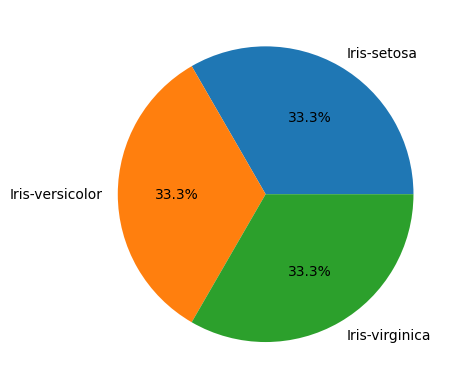

In [99]:
plt.pie(df['Species'].value_counts(),labels=df['Species'].unique(),autopct='%1.1f%%')

All three species are in equal number in the dataset, which means the dataset is highly balanced.

### Sepal Length and Species

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

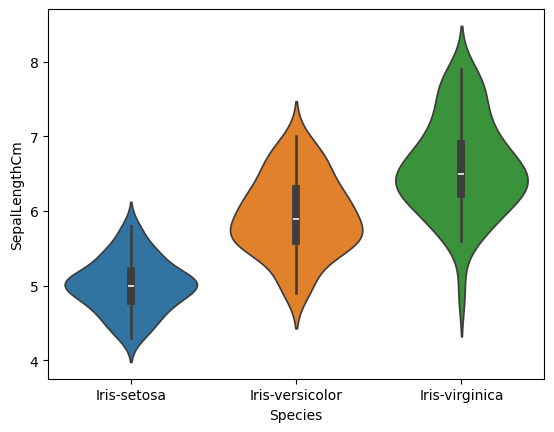

In [100]:
sns.violinplot(x='Species',y='SepalLengthCm',data=df, hue = 'Species')

This graph shows the relation between the sepal length and the flower species. Here, we can easily see that the virginica specides has much higher sepal length foloowed by versicolor and setosa with the least sepal length.

### Sepal Width and Species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

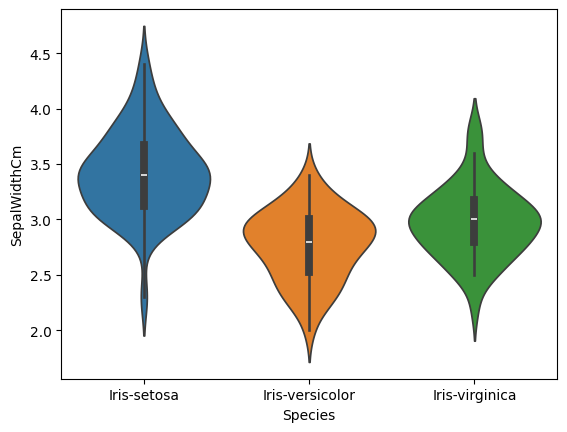

In [101]:
sns.violinplot(x='Species',y='SepalWidthCm',data=df, hue = 'Species')

Through this graph we can easily distinguish between the species based on the sepal width. The setosa species has the highest sepal width followed by virginica and versicolor has the least sepal width.

### Petal Length and Species

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

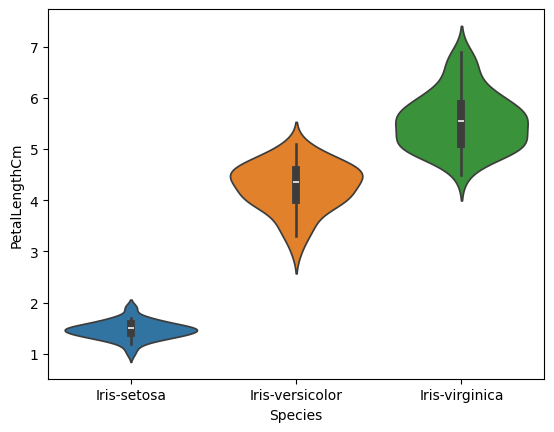

In [102]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df, hue = 'Species')

Here, we can the distribution of the petal length for all the three species. The virginica species has the highest petal length followed by versicolor and setosa has the least petal length.

### Petal Width and Species

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

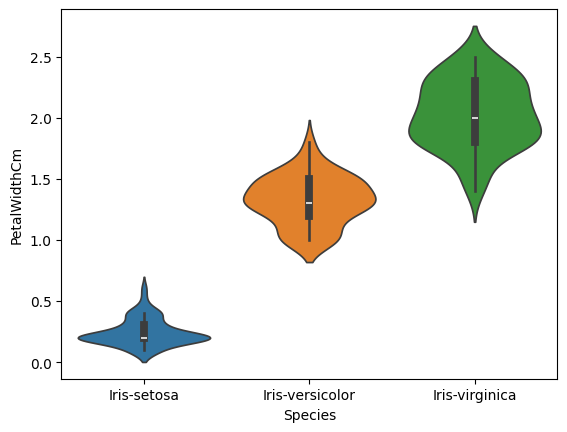

In [103]:
sns.violinplot(x='Species',y='PetalWidthCm',data=df, hue = 'Species')

Here also, the virginica species has the highest petal width followed by versicolor and setosa has the least petal width.

### Pairplot

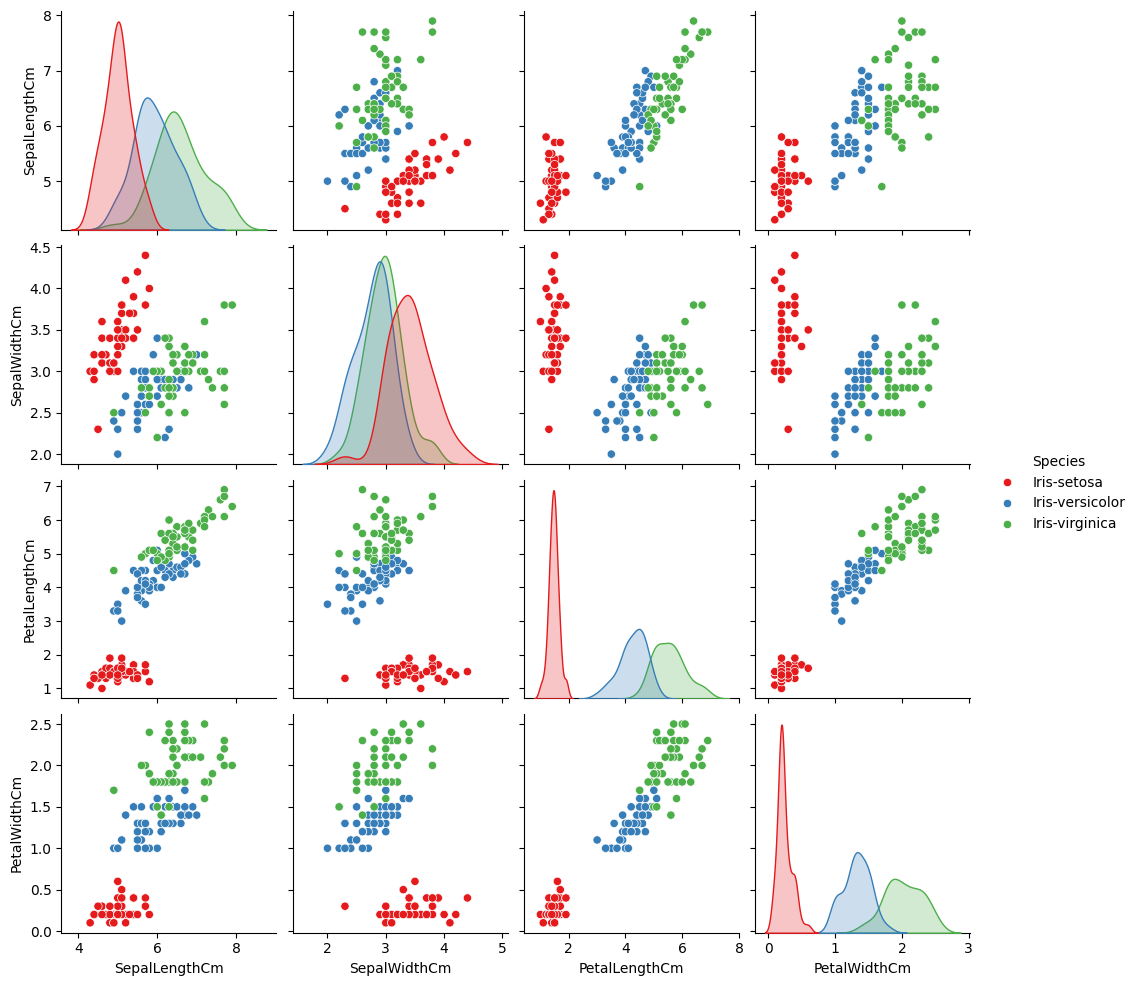

In [104]:
sns.pairplot(df,hue='Species', palette='Set1')

## Data Preprocessing Part 2

### Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#label encoding the species column
df['Species'] = le.fit_transform(df['Species'])

In [106]:
df['Species'].unique()

array([0, 1, 2])

## Correlation Matrix Heatmap

<Axes: >

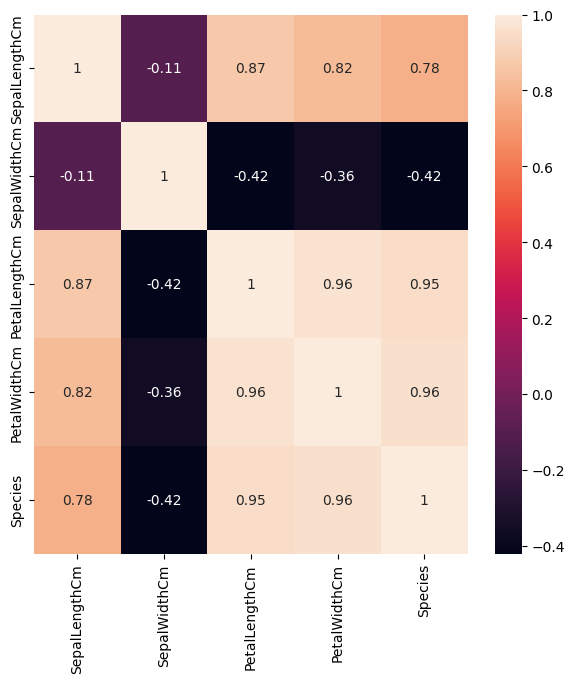

In [107]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

## Train Test Split

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Species',axis=1), df['Species'], test_size=0.30, random_state=100)

## Model Building

I will be using the following algorithms to build the model:

- Decision Tree Classifier
- Random Forest Classifier
- K Nearest Neighbors Classifier

### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

#decision tree classifier object
dtree = DecisionTreeClassifier()

##### Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,4,6,8,10,12],
    'min_samples_leaf': [2,4,6,8,10,12],
    'criterion': ['gini','entropy'],
    'random_state': [0,42]
}

#grid search object
grid = GridSearchCV(dtree, para, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training set
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [111]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the decision tree classifier object to the training set
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.9809523809523809


### Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

#### Hyperparameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,4,6,8,10,12],
    'min_samples_leaf': [2,4,6,8,10,12],
    'criterion': ['gini','entropy'],
    'random_state': [0,42]
}

#grid search object
grid = GridSearchCV(rfc, para, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training set
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


In [114]:
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=6, min_samples_split=2, random_state=0)

#fitting the random forest classifier object to the training set
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

0.9809523809523809


### K Nearest Neighbors Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier

#knn classifier object
knn = KNeighborsClassifier()

#### Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [10,20,30,40,50],
    'p': [1,2]
}

#grid search object
grid = GridSearchCV(knn, para, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training set
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [117]:
#knn classifier object with best parameters
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=13, p=1, weights='uniform')

#fitting the knn classifier object to the training set
knn.fit(X_train,y_train)

#training accuracy
print(knn.score(X_train,y_train))

#Predicting the test set results
k_pred = knn.predict(X_test)

0.9714285714285714


## Model Evaluation

### Confusion Matrix

Text(0.5, 1.0, 'KNN Classifier')

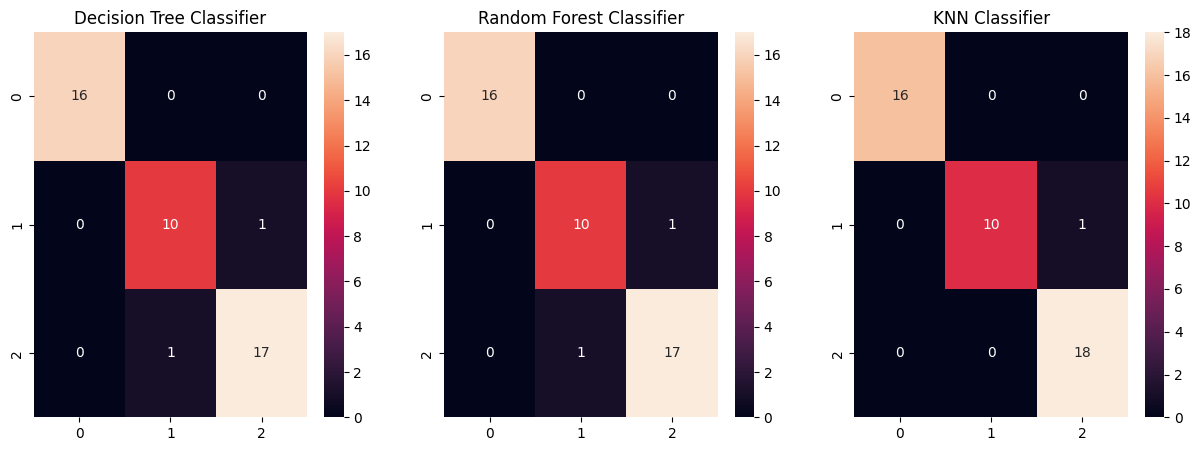

In [118]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
from sklearn.metrics import confusion_matrix

#confusion matrix for decision tree classifier
cm = confusion_matrix(y_test,d_pred)
sns.heatmap(cm,annot=True,ax=ax[0]).set_title('Decision Tree Classifier')

#confusion matrix for random forest classifier
cm = confusion_matrix(y_test,r_pred)
sns.heatmap(cm,annot=True,ax=ax[1]).set_title('Random Forest Classifier')

#confusion matrix for knn classifier
cm = confusion_matrix(y_test,k_pred)
sns.heatmap(cm,annot=True,ax=ax[2]).set_title('KNN Classifier')

In [119]:
from sklearn.metrics import classification_report

#classification report for decision tree classifier
print('Decision Tree Classifier')
print(classification_report(y_test,d_pred))

#classification report for random forest classifier
print('Random Forest Classifier')
print(classification_report(y_test,r_pred))

#classification report for knn classifier
print('KNN Classifier')
print(classification_report(y_test,k_pred))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

KNN Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
          

Text(0.5, 1.0, 'Root Mean Squared Error')

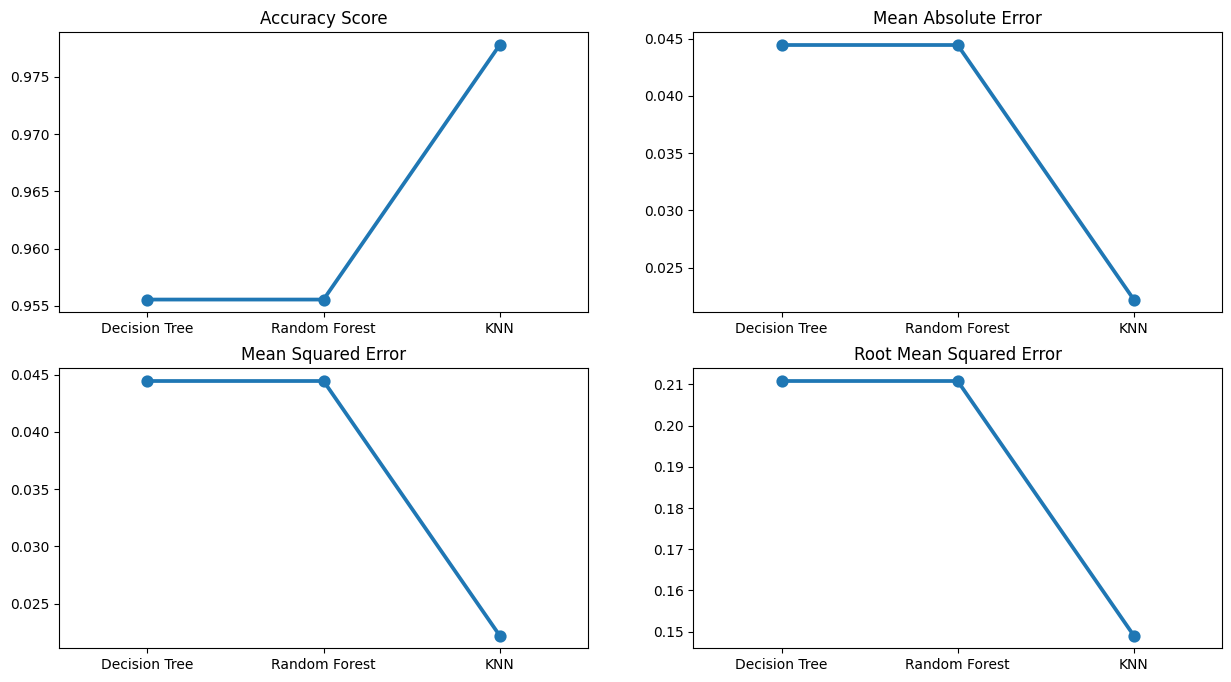

In [126]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

fig, ax = plt.subplots(2,2,figsize=(15,8))

#accuracy score
sns.pointplot(x = ['Decision Tree','Random Forest','KNN'],y = [accuracy_score(y_test,d_pred),accuracy_score(y_test,r_pred),accuracy_score(y_test,k_pred)],ax=ax[0,0]).set_title('Accuracy Score')

#mean absolute error
sns.pointplot(x = ['Decision Tree','Random Forest','KNN'],y = [mean_absolute_error(y_test,d_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,k_pred)],ax=ax[0,1]).set_title('Mean Absolute Error')

#mean squared error
sns.pointplot(x = ['Decision Tree','Random Forest','KNN'],y = [mean_squared_error(y_test,d_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,k_pred)],ax=ax[1,0]).set_title('Mean Squared Error')

#root mean squared error
sns.pointplot(x = ['Decision Tree','Random Forest','KNN'],y = [np.sqrt(mean_squared_error(y_test,d_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,k_pred))],ax=ax[1,1]).set_title('Root Mean Squared Error')

## Conclusion

From the exploratory data analysis, we can conclude that the sepal and petal, lengths and widths are the most important features to distinguish between the species. The virginica species has the highest petal lenght-width and sepal length. The K Nearest Neighbors Classifier model performed the best with an accuracy of 97.78%.